# Célula 1 — Instalação de pacotes e download do dataset (kagglehub)

O que faz:
- Executa comandos `pip` para instalar bibliotecas necessárias (`matplotlib`, `kagglehub`, `pandas`, `numpy`, `scipy`).
- Importa `kagglehub` e baixa o dataset `tmdb/tmdb-movie-metadata`, armazenando o caminho retornado em `path`.
- Imprime o caminho onde os arquivos do dataset foram salvos.

Entradas/Saídas: não há entrada de arquivo explícita; saída = pacotes instalados (se necessário) e `path` com local do dataset.

Observações:
- Em ambientes já preparados as linhas `!pip install ...` podem ser removidas. O download do dataset via `kagglehub` requer credenciais/configuração do Kaggle no ambiente; se faltar, a célula pode falhar.

In [ ]:
# EXERCÍCIOS DE ANÁLISE DE FILMES
# Autor: Fernanda Martins da Silva BV3032345
!pip install matplotlib
!pip install kagglehub
!pip install pandas
!pip install numpy
!pip install scipy  

import kagglehub

path = kagglehub.dataset_download("tmdb/tmdb-movie-metadata")

print("Path to dataset files:", path)
#path to dataset files: /home/fernanda/.cache/kagglehub/datasets/tmdb/tmdb-movie-metadata/versions/2

# Célula 2 — Carregamento do CSV e limpeza inicial

O que faz:
- Importa `pandas`, `numpy`, `matplotlib` e funções de correlação do `scipy`.
- Lê o CSV `tmdb_5000_movies.csv` (local esperado no cache do `kagglehub`) e exibe shape, primeiras linhas e colunas relevantes.
- Converte colunas `budget`, `revenue` e `vote_average` para numérico (valores inválidos viram `NaN`).
- Calcula ROI para filmes com `budget > 0`, remove valores infinitos e `NaN` nas colunas usadas e exibe o número de registros válidos.
- Plota histogramas (linear e log) para `budget` e histograma para `roi` com corte de outliers.
- Calcula Pearson e Spearman para pares de variáveis selecionadas e plota scatter/linha de tendência para `budget` vs `revenue` em escala log1p e `roi` vs `vote_average`.

Entradas/Saídas: entrada = CSV do TMDB; saída = `df_clean` e visualizações/estatísticas impressas.

Observações: certifique-se do caminho do CSV; o notebook usa `/home/fernanda/.cache/kagglehub/...` por padrão.

(4803, 20)


,title,budget,revenue,vote_average,popularity
0,Avatar,237000000,2787965087,7.2,150.437577
1,Pirates of the Caribbean: At World's End,300000000,961000000,6.9,139.082615
2,Spectre,245000000,880674609,6.3,107.376788
3,The Dark Knight Rises,250000000,1084939099,7.6,112.312950
4,John Carter,260000000,284139100,6.1,43.926995


['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count']


,budget,revenue,vote_average
count,4.803000e+03,4.803000e+03,4803.000000
mean,2.904504e+07,8.226064e+07,6.092172
std,4.072239e+07,1.628571e+08,1.194612
min,0.000000e+00,0.000000e+00,0.000000
25%,7.900000e+05,0.000000e+00,5.600000
50%,1.500000e+07,1.917000e+07,6.200000
75%,4.000000e+07,9.291719e+07,6.800000
max,3.800000e+08,2.787965e+09,10.000000


Registros com budget>0: 3766
Registros válidos para análise: 3766


,title,budget,revenue,roi,vote_average
0,Avatar,237000000,2787965087,10.763566,7.2
1,Pirates of the Caribbean: At World's End,300000000,961000000,2.203333,6.9
2,Spectre,245000000,880674609,2.594590,6.3
3,The Dark Knight Rises,250000000,1084939099,3.339756,7.6
4,John Carter,260000000,284139100,0.092843,6.1


,count,mean,median,std,min,max
budget,3766.0,3.704284e+07,2.300000e+07,4.264651e+07,1.0,3.800000e+08
revenue,3766.0,1.039547e+08,3.883137e+07,1.776399e+08,0.0,2.787965e+09
roi,3766.0,2.532490e+03,8.675333e-01,1.394602e+05,-1.0,8.499999e+06
vote_average,3766.0,6.226474e+00,6.300000e+00,9.662279e-01,0.0,1.000000e+01


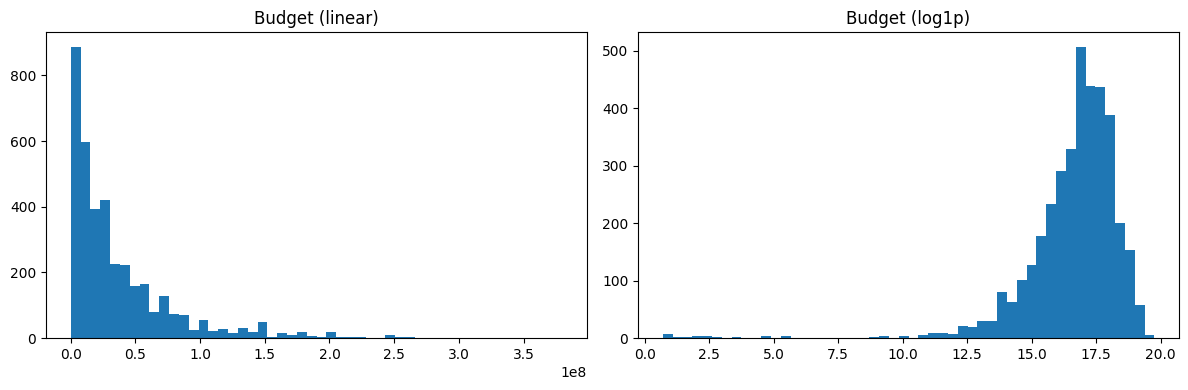

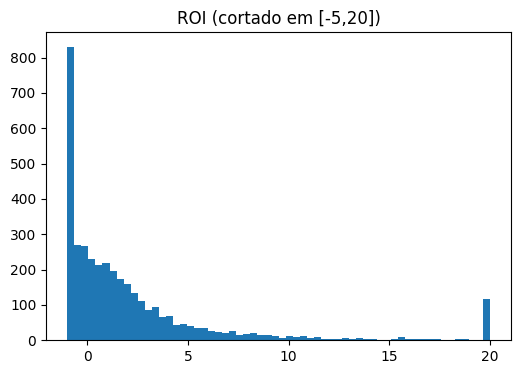

budget vs revenue:
  Pearson r = 0.7099, p = 0
  Spearman rho = 0.6522, p = 0

budget vs vote_average:
  Pearson r = 0.0195, p = 0.2318
  Spearman rho = -0.0706, p = 1.428e-05

revenue vs vote_average:
  Pearson r = 0.2030, p = 2.623e-36
  Spearman rho = 0.1987, p = 7.526e-35

roi vs vote_average:
  Pearson r = 0.0288, p = 0.07726
  Spearman rho = 0.3475, p = 2.429e-107



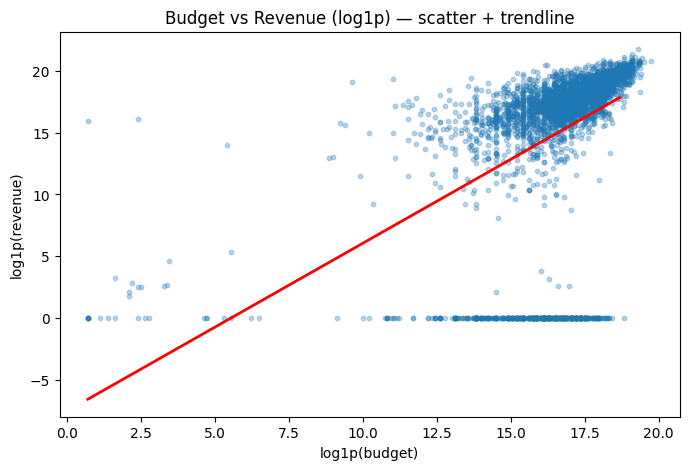

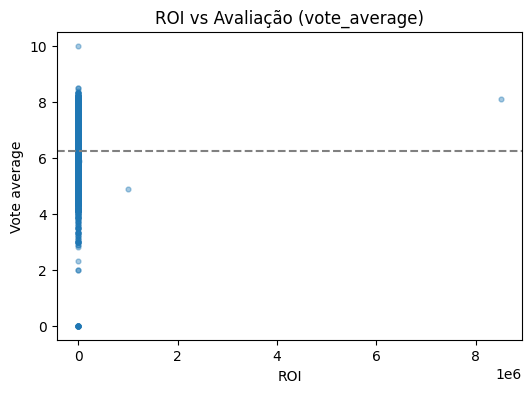

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# carregar (use low_memory=False para evitar warnings)
df = pd.read_csv('/home/fernanda/.cache/kagglehub/datasets/tmdb/tmdb-movie-metadata/versions/2/tmdb_5000_movies.csv', low_memory=False)

# ver primeiras linhas e colunas relevantes
print(df.shape)
display(df.head()[['title','budget','revenue','vote_average','popularity']])
print(df.columns.tolist())

# converter para numérico, valores inválidos -> NaN
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['vote_average'] = pd.to_numeric(df['vote_average'], errors='coerce')

# explorar resumo
display(df[['budget','revenue','vote_average']].describe())

# quantos com budget > 0
print("Registros com budget>0:", (df['budget'] > 0).sum())

# calcular ROI (apenas onde budget > 0)
df_clean = df[df['budget'] > 0].copy()
df_clean['roi'] = (df_clean['revenue'] - df_clean['budget']) / df_clean['budget']

# remover infinitos e NaNs (se houver)
df_clean = df_clean.replace([np.inf, -np.inf], np.nan).dropna(subset=['budget','revenue','vote_average','roi'])

print("Registros válidos para análise:", df_clean.shape[0])
display(df_clean[['title','budget','revenue','roi','vote_average']].head())

# estatísticas resumo
display(df_clean[['budget','revenue','roi','vote_average']].agg(['count','mean','median','std','min','max']).T)

# histogramas (com escala log para budget/revenue, que são muito enviesados)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(df_clean['budget'], bins=50)
plt.title('Budget (linear)')
plt.subplot(1,2,2)
plt.hist(np.log1p(df_clean['budget']), bins=50)
plt.title('Budget (log1p)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df_clean['roi'].clip(-5, 20), bins=60)  # cortar outliers extremos para visualizar
plt.title('ROI (cortado em [-5,20])')
plt.show()

pairs = [
    ('budget','revenue'),
    ('budget','vote_average'),
    ('revenue','vote_average'),
    ('roi','vote_average'),
]

for a,b in pairs:
    x = df_clean[a].values
    y = df_clean[b].values
    # pearsonr exige variância em ambos; tratar exceção
    try:
        p_coef, p_pval = pearsonr(x, y)
    except Exception as e:
        p_coef, p_pval = (np.nan, np.nan)
    # spearman
    try:
        s_coef, s_pval = spearmanr(x, y)
    except Exception as e:
        s_coef, s_pval = (np.nan, np.nan)
    print(f"{a} vs {b}:")
    print(f"  Pearson r = {p_coef:.4f}, p = {p_pval:.4g}")
    print(f"  Spearman rho = {s_coef:.4f}, p = {s_pval:.4g}")
    print()

import numpy as np

# Budget vs Revenue (plot em escala log para melhor visualização)
plt.figure(figsize=(8,5))
plt.scatter(np.log1p(df_clean['budget']), np.log1p(df_clean['revenue']), alpha=0.3, s=10)
# linha de tendência (linear em log1p)
m,b = np.polyfit(np.log1p(df_clean['budget']), np.log1p(df_clean['revenue']), 1)
xvals = np.linspace(np.log1p(df_clean['budget']).min(), np.log1p(df_clean['budget']).quantile(0.95), 100)
plt.plot(xvals, m*xvals + b, color='red', lw=2)
plt.xlabel('log1p(budget)')
plt.ylabel('log1p(revenue)')
plt.title('Budget vs Revenue (log1p) — scatter + trendline')
plt.show()

# ROI vs vote_average
plt.figure(figsize=(6,4))
plt.scatter(df_clean['roi'], df_clean['vote_average'], alpha=0.4, s=12)
plt.xlabel('ROI')
plt.ylabel('Vote average')
plt.title('ROI vs Avaliação (vote_average)')
plt.axhline(df_clean['vote_average'].mean(), color='gray', linestyle='--')
plt.show()


